In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

%matplotlib inline

print("Modules imported successfully!")


# Load the data from the uploaded Excel file
file_path = './VSM_BRIMS_03_02.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


Modules imported successfully!


,task,participant,trial,decision_type,choice,OEE1,OEE2,CT1,CT2
0,0,0,0,0,1,88,86,46,48
1,0,0,1,1,1,88,86,46,48
2,0,0,2,0,1,88,86,46,48
3,0,0,3,0,1,88,86,46,48
4,0,0,4,0,1,88,86,46,48


In [25]:
import pandas as pd
import statsmodels.formula.api as smf

data['participant_task'] = data['participant'].astype(str) + "_" + data['task'].astype(str)

# Convert columns to appropriate types
data['trial'] = data['trial'].astype(int)
data['decision_type'] = data['decision_type'].astype(int)
data['participant_task'] = data['participant_task'].astype('category')

model = smf.mixedlm("decision_type ~ trial", data, groups=data["participant_task"])

result = model.fit(method='nm', maxiter=1000, tol=1e-6)  # Using Nelder-Mead optimizer

if not result.converged:
    print("Warning: The model did not converge")
else:
    print("The model converged successfully.")
print(result.summary())


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method nm is: xtol, ftol, maxfun. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(


The model converged successfully.
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decision_type
No. Observations: 2012    Method:             REML         
No. Groups:       133     Scale:              0.6179       
Min. group size:  14      Log-Likelihood:     -2388.1546   
Max. group size:  16      Converged:          Yes          
Mean group size:  15.1                                     
------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.393     0.038  10.479  0.000   0.320   0.467
trial         0.086     0.004  21.437  0.000   0.078   0.094
Group Var     0.007     0.008                               



/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data['decision_type'] = data['decision_type'].fillna(0).astype(int)

# Ordered logistic regression model without adding a constant
model = OrderedModel(data['decision_type'], 
                     data[['trial']], 
                     distr='logit')

result = model.fit(method='bfgs', disp=False)

print(result.summary())

                             OrderedModel Results                             
Dep. Variable:          decision_type   Log-Likelihood:                -1944.1
Model:                   OrderedModel   AIC:                             3894.
Method:            Maximum Likelihood   BIC:                             3911.
Date:                Mon, 12 Aug 2024                                         
Time:                        15:53:07                                         
No. Observations:                2012                                         
Df Residuals:                    2009                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trial          0.2056      0.011     18.976      0.000       0.184       0.227
0/1            0.8781      0.093      9.439      0.0

In [2]:

data2 = data.iloc[1000:1200]

# Display the first few rows of the subset to understand its structure
data2.head()

,task,participant,trial,decision_type,choice,OEE1,OEE2,CT1,CT2
1000,14,3,2,1,0,84,87,51,43
1001,14,3,3,1,0,84,87,51,43
1002,14,3,4,0,1,84,87,51,43
1003,14,3,5,0,1,84,87,51,43
1004,14,3,6,1,0,84,87,51,43


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


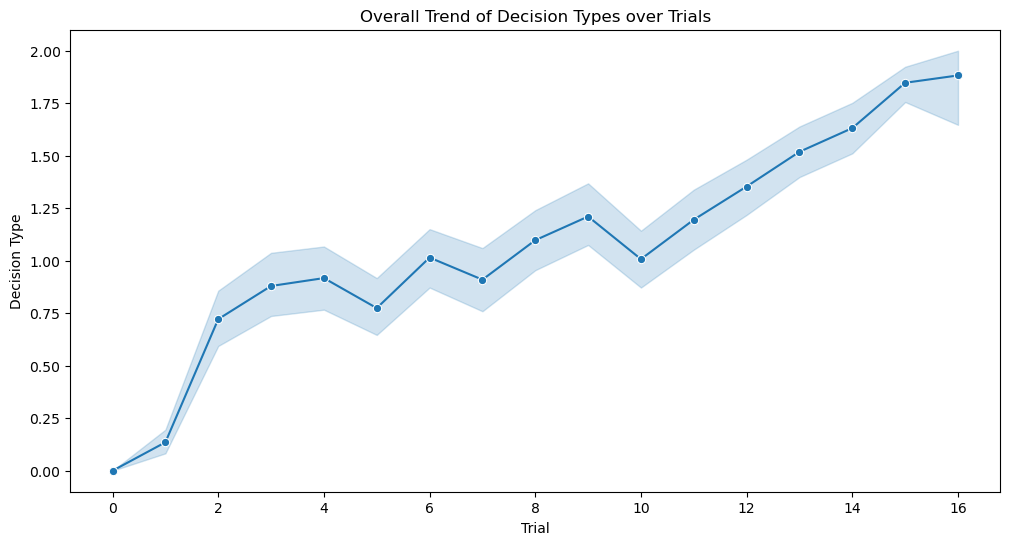

In [16]:
# Plot overall trend of decision types over trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='trial', y='decision_type', marker='o')
plt.title('Overall Trend of Decision Types over Trials')
plt.xlabel('Trial')
plt.ylabel('Decision Type')
plt.show()


In [26]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'task' is a column in your DataFrame, create a new column that combines 'participant' and 'task'
data2['participant_task'] = data2['participant'].astype(str) + "_" + data2['task'].astype(str)

# Convert columns to appropriate types
data2['trial'] = data2['trial'].astype(int)
data2['decision_type'] = data2['decision_type'].astype(int)
data2['participant_task'] = data2['participant_task'].astype('category')

# Fit a mixed-effects logistic regression model using the new participant_task group
model = smf.mixedlm("decision_type ~ trial", data2, groups=data2["participant_task"])
result = model.fit(method='nm', maxiter=1000, tol=1e-6)

# Print the summary of the model
print(result.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decision_type
No. Observations: 200     Method:             REML         
No. Groups:       14      Scale:              0.5989       
Min. group size:  6       Log-Likelihood:     -236.9569    
Max. group size:  15      Converged:          Yes          
Mean group size:  14.3                                     
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.398     0.114  3.484  0.000   0.174   0.621
trial          0.093     0.013  7.313  0.000   0.068   0.118
Group Var      0.000     0.024                              



/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method nm is: xtol, ftol, maxfun. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data2['decision_type'] = data2['decision_type'].fillna(0).astype(int)

# Ordered logistic regression model without adding a constant
model = OrderedModel(data2['decision_type'], 
                     data2[['trial']], 
                     distr='logit')

result = model.fit(method='bfgs', disp=False)

print(result.summary())


                             OrderedModel Results                             
Dep. Variable:          decision_type   Log-Likelihood:                -188.73
Model:                   OrderedModel   AIC:                             383.5
Method:            Maximum Likelihood   BIC:                             393.4
Date:                Mon, 12 Aug 2024                                         
Time:                        12:14:21                                         
No. Observations:                 200                                         
Df Residuals:                     197                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trial          0.2267      0.035      6.410      0.000       0.157       0.296
0/1            0.8231      0.287      2.868      0.0

/var/folders/_w/9q3jvwnj3mv246z3f84996y80000gn/T/ipykernel_80021/2372750936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['decision_type'] = data2['decision_type'].fillna(0).astype(int)


In [7]:
data3 = data.iloc[230:500]

# Display the first few rows of the subset to understand its structure
data3.head()

,task,participant,trial,decision_type,choice,OEE1,OEE2,CT1,CT2
230,1,0,4,0,1,91,87,49,50
231,1,0,5,0,1,91,87,49,50
232,1,0,6,0,1,91,87,49,50
233,1,0,7,2,0,91,87,49,50
234,1,0,8,2,0,91,87,49,50


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


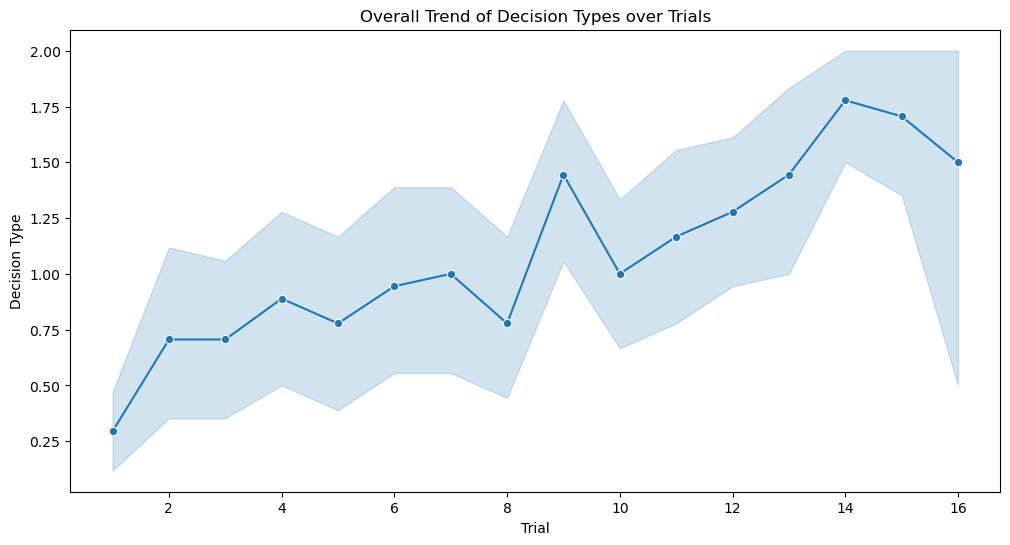

In [8]:
# Plot overall trend of decision types over trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=data3, x='trial', y='decision_type', marker='o')
plt.title('Overall Trend of Decision Types over Trials')
plt.xlabel('Trial')
plt.ylabel('Decision Type')
plt.show()

In [9]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'task' is a column in your DataFrame, create a new column that combines 'participant' and 'task'
data3['participant_task'] = data3['participant'].astype(str) + "_" + data3['task'].astype(str)

# Convert columns to appropriate types
data3['trial'] = data3['trial'].astype(int)
data3['decision_type'] = data3['decision_type'].astype(int)
data3['participant_task'] = data3['participant_task'].astype('category')

# Fit a mixed-effects logistic regression model using the new participant_task group
model = smf.mixedlm("decision_type ~ trial", data3, groups=data3["participant_task"])
result = model.fit()

# Print the summary of the model
print(result.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decision_type
No. Observations: 270     Method:             REML         
No. Groups:       18      Scale:              0.6472       
Min. group size:  13      Log-Likelihood:     -329.0399    
Max. group size:  16      Converged:          Yes          
Mean group size:  15.0                                     
------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      0.404     0.104  3.872  0.000   0.200   0.609
trial          0.082     0.011  7.222  0.000   0.060   0.104
Group Var      0.000     0.028                              



/var/folders/_w/9q3jvwnj3mv246z3f84996y80000gn/T/ipykernel_80021/4263934171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['participant_task'] = data3['participant'].astype(str) + "_" + data3['task'].astype(str)
/var/folders/_w/9q3jvwnj3mv246z3f84996y80000gn/T/ipykernel_80021/4263934171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['trial'] = data3['trial'].astype(int)
/var/folders/_w/9q3jvwnj3mv246z3f84996y80000gn/T/ipykernel_80021/4263934171.py:9: SettingWithCopyWarning: 
A value is

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data3['decision_type'] = data3['decision_type'].fillna(0).astype(int)

# Ordered logistic regression model without adding a constant
model = OrderedModel(data3['decision_type'], 
                     data3[['trial']], 
                     distr='logit')

result = model.fit(method='bfgs', disp=False)

print(result.summary())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = {
    'trial': np.arange(17),
    'mean_decision_type': [0.0, 0.25, 0.5, 0.75, 0.75, 1.0, 1.25, 1.0, 1.25, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 2.0]
}
df = pd.DataFrame(data)

# Fit a linear regression model
X = df['trial'].values.reshape(-1, 1)
y = df['mean_decision_type'].values
model = LinearRegression()
model.fit(X, y)

# Calculate the learning rate (slope)
learning_rate = model.coef_[0]

# Predict values to calculate residuals
y_pred = model.predict(X)

# Calculate the variance of the residuals
residuals = y - y_pred
variance = np.var(residuals)

# Print the learning rate and variance
print(f"Learning Rate: {learning_rate}")
print(f"Variance of Residuals: {variance}")

# Plot the regression line on the graph for visualization
plt.figure(figsize=(10, 6))
plt.plot(df['trial'], df['mean_decision_type'], marker='o', label='Mean Decision Type')
plt.plot(df['trial'], y_pred, linestyle='--', color='red', label='Linear Fit')
plt.fill_between(df['trial'], df['mean_decision_type'] - np.sqrt(variance), df['mean_decision_type'] + np.sqrt(variance), alpha=0.2)
plt.xlabel('Trial')
plt.ylabel('Decision Type')
plt.title('Overall Trend of Decision Types over Trials with Linear Fit')
plt.legend()
plt.show()
